In [21]:
import cv2
import numpy as np
import glob
import os
import sys
import matplotlib.pyplot as plt
import nibabel as nib

plt.style.use('dark_background')

In [32]:
img_folder = 'results\\ct_color\\test_latest\\bg_fix'

img_list = glob.glob(img_folder+'\\'+'*.png')
n_img = len(img_list)
file0 = img_list[0]
shape = cv2.imread(file0).shape
shape = (n_img,shape[1],shape[0],shape[2])

img_names = [ int(name.split('\\')[-1].split('.')[0]) for name in img_list ]
img_names.sort()

stacked = np.zeros((shape))

for name in img_names:
    file = img_folder+'\\'+str(name)+'.png'
    img = cv2.imread(file)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
    stacked[name] = img
    
stacked = np.uint8(stacked)
ct = np.array(nib.load('nii_data\Libra_CX1_T1_221_184_1485_Energy1.nii').get_data())
ct = (ct/ct.max())*255


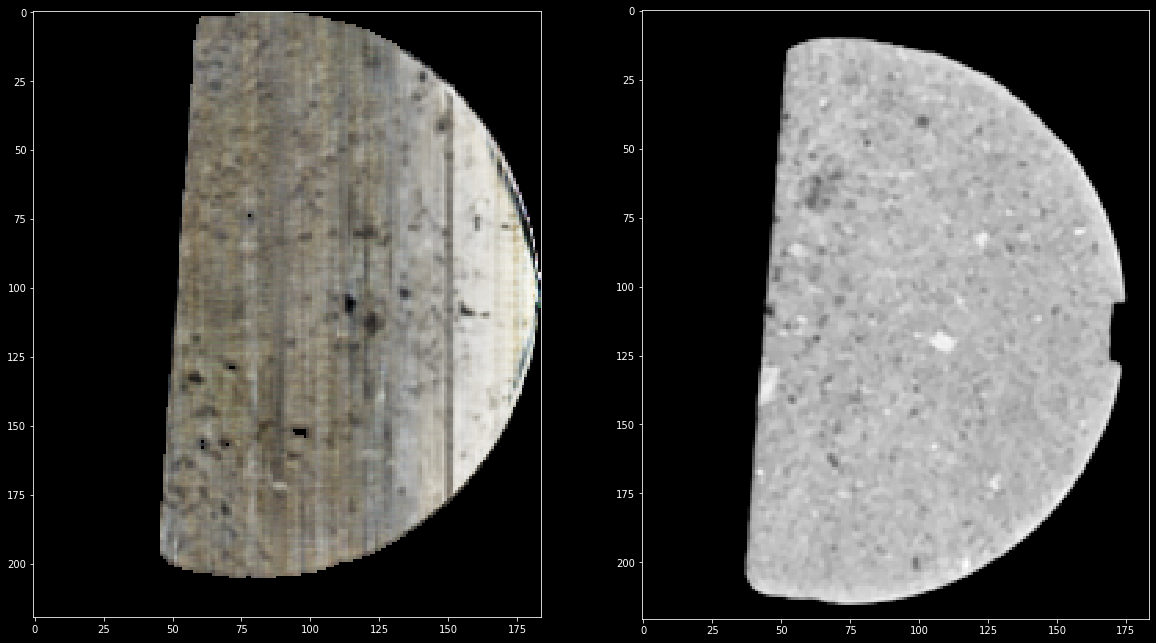

In [48]:
show = stacked[:,120,:,:]
ctshow = ct[::-1,::,120]
if show.shape[1] > show.shape[0]:
    show = np.rollaxis(show,1,start=0)
    ctshow = np.rollaxis(ctshow,0,start=0)
    
plt.figure(figsize=[20,30])
plt.subplot(1,2,1)
plt.imshow(show)
plt.subplot(1,2,2)
plt.imshow(ctshow,cmap='gray')

In [37]:
ctshow.shape

(184, 1485)